In [ ]:
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to  Drive location
file_path = '/content/drive/MyDrive/insurance_claims.xlsx'

# Read Excel file properly
df = pd.read_excel(file_path)

# Check the first 5 rows
print(df.head())


Mounted at /content/drive
  claim_id  customer_age policy_type  claim_amount  claim_history  \
0    C0001            56        Home      44162.67              0   
1    C0002            69        Auto      43720.33              1   
2    C0003            46      Health       2433.12              2   
3    C0004            32        Home      41465.02              3   
4    C0005            60        Auto       7314.62              0   

  incident_type  reported_delay  is_fraud  
0          Fire              23         1  
1          Fire              17         0  
2         Theft              22         0  
3          Fire               5         0  
4         Theft              28         0  


In [ ]:
# Dataset overview
df.info()
df.describe()

# Fraud distribution
df['is_fraud'].value_counts(normalize=True) * 100


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   claim_id        1000 non-null   object 
 1   customer_age    1000 non-null   int64  
 2   policy_type     1000 non-null   object 
 3   claim_amount    1000 non-null   float64
 4   claim_history   1000 non-null   int64  
 5   incident_type   1000 non-null   object 
 6   reported_delay  1000 non-null   int64  
 7   is_fraud        1000 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 62.6+ KB


,proportion
is_fraud,
0,89.4
1,10.6


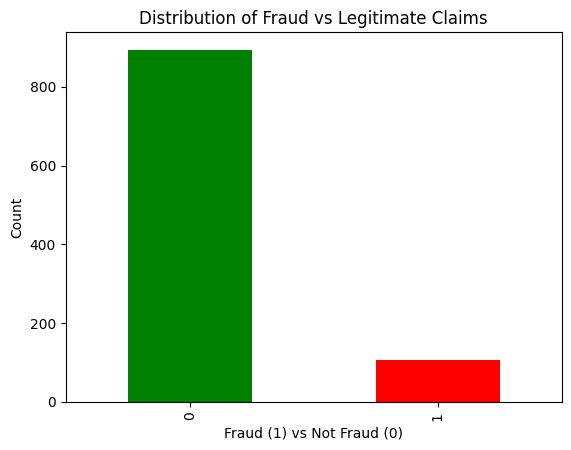

In [ ]:
import matplotlib.pyplot as plt

df['is_fraud'].value_counts().plot(kind='bar', color=['green','red'])
plt.title('Distribution of Fraud vs Legitimate Claims')
plt.xlabel('Fraud (1) vs Not Fraud (0)')
plt.ylabel('Count')
plt.show()


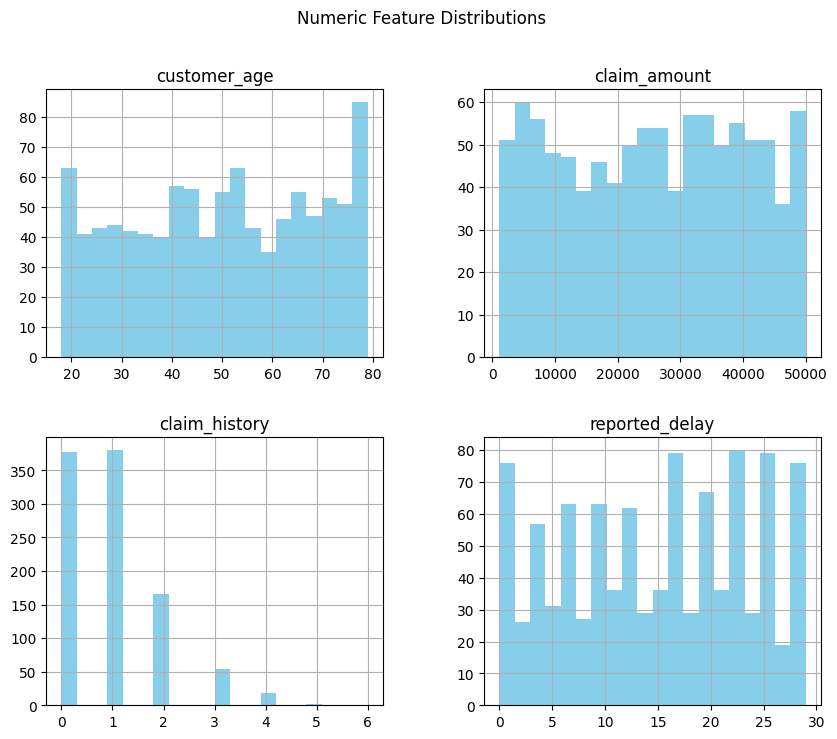

In [ ]:
df[['customer_age','claim_amount','claim_history','reported_delay']].hist(
    bins=20, figsize=(10,8), color='skyblue')
plt.suptitle("Numeric Feature Distributions")
plt.show()


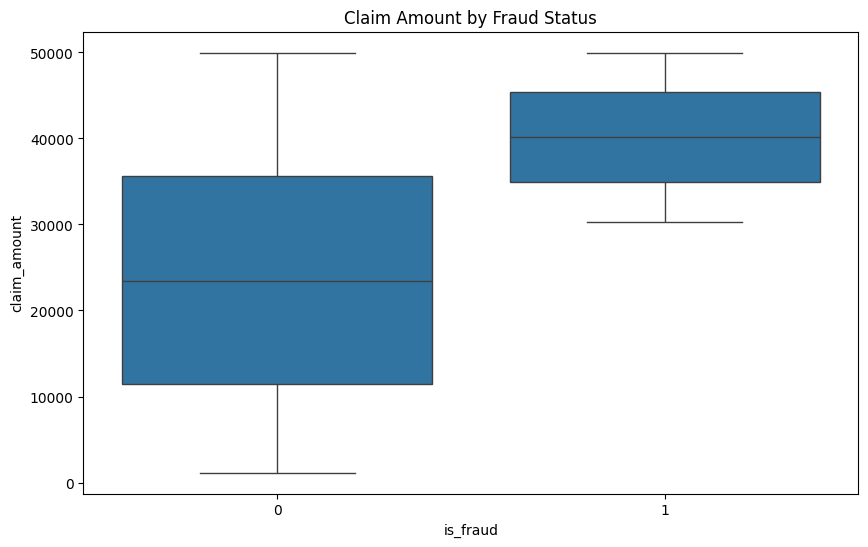

In [ ]:
import seaborn as sns

#boxplots to plot outliers
plt.figure(figsize=(10,6))
sns.boxplot(x='is_fraud', y='claim_amount', data=df)
plt.title("Claim Amount by Fraud Status")
plt.show()


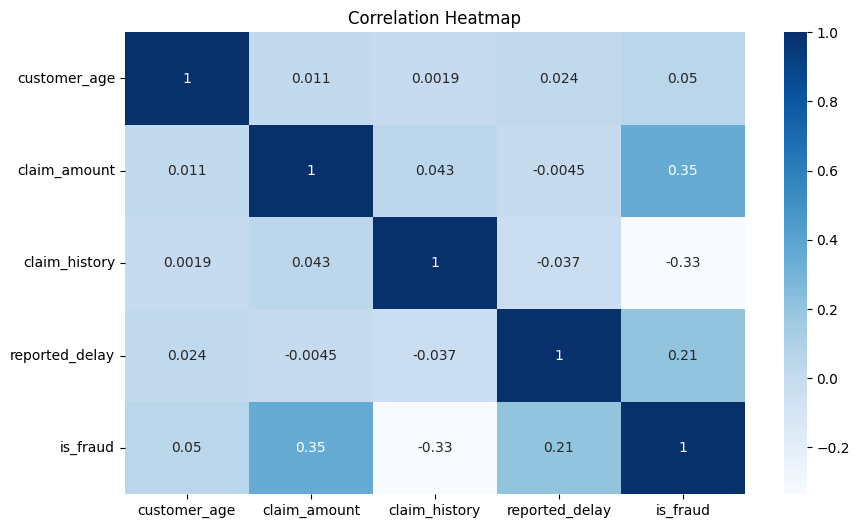

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#DATA CLEANING AND PREPROCESSING

In [ ]:
#checking for missing values
df.isnull().sum()

,0
claim_id,0
customer_age,0
policy_type,0
claim_amount,0
claim_history,0
incident_type,0
reported_delay,0
is_fraud,0


In [ ]:
#Encoding categorical variables
df = pd.get_dummies(df, columns=['policy_type','incident_type'], drop_first=True)



In [ ]:
#split features and target
X = df.drop(['claim_id','is_fraud'], axis=1)
y = df['is_fraud']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)



In [ ]:
#MODEL EVALUATION

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.97
[[178   1]
 [  5  16]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       179
           1       0.94      0.76      0.84        21

    accuracy                           0.97       200
   macro avg       0.96      0.88      0.91       200
weighted avg       0.97      0.97      0.97       200



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 1.0
[[179   0]
 [  0  21]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       179
           1       1.00      1.00      1.00        21

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



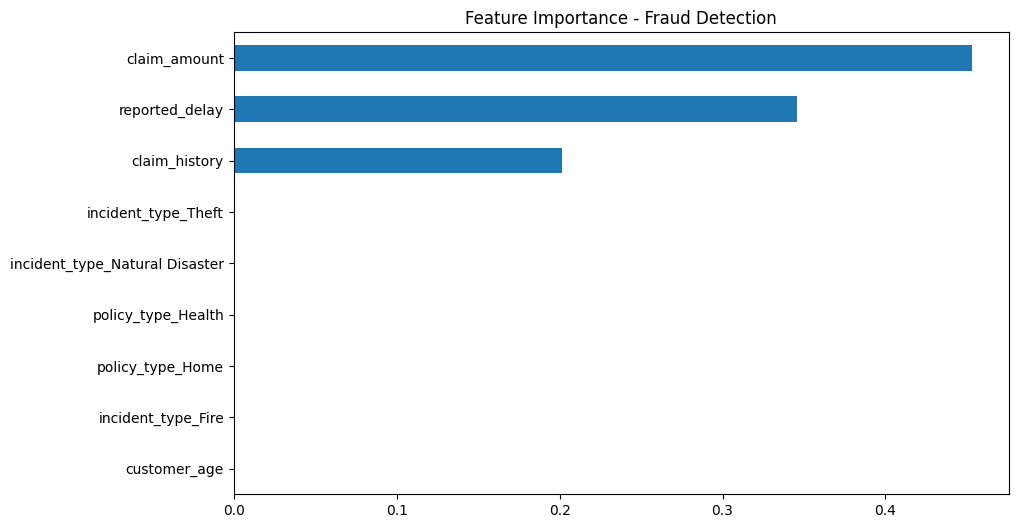

In [ ]:
#Feature importance
import pandas as pd

feat_importances = pd.Series(tree_model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance - Fraud Detection")
plt.show()


In [ ]:
import joblib
joblib.dump(tree_model, 'fraud_detection_model.pkl')


['fraud_detection_model.pkl']